In [24]:
#QUESTION---1

Bangalore


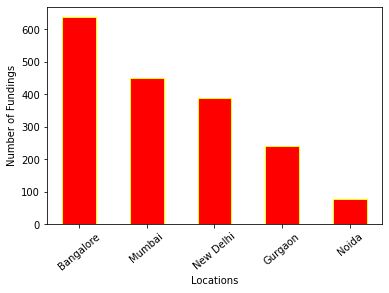

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
startup = pd.read_csv("startup_funding.csv")  #reading data from startup_funding.csv file
df = startup.copy()  #creating a copy of startup dataframe...

df.dropna(subset = ["CityLocation"],inplace = True)  #removing row's having nan's in city location column
df["CityLocation"].replace("bangalore","Bangalore",inplace = True)  #replacing the wrong word with the correct one..
df["CityLocation"].replace("Delhi","New Delhi",inplace = True)

d1 = {}   #dictionary to maintain the number of fundings in the provided locations...

for i in df["CityLocation"]: #traversing through all the locations and maintaining the number of times the provided locations fetched...using if else..
    if "Bangalore" in i:
        d1["Bangalore"] = d1.get("Bangalore",0) + 1  
    elif "Mumbai" in i:
        d1["Mumbai"] = d1.get("Mumbai",0) + 1
    elif "New Delhi" in i:
        d1["New Delhi"] = d1.get("New Delhi",0) + 1
    elif "Noida" in i:
        d1["Noida"] = d1.get("Noida",0) + 1
    elif "Gurgaon" in i:
        d1["Gurgaon"] = d1.get("Gurgaon",0) + 1
        
cities = sorted(d1, key=d1.get , reverse=True)   #sorting the keys in reverse order(descending to aescending) according to the values...
fundings = []  

for i in cities:  #traversing through the cities...and created a new list of values...in sorted format 
    fundings.append(d1[i])
    
print(cities[0]) #printing the location having most number of fundings

plt.bar(cities,fundings,width = 0.5,color = "red" , edgecolor = "yellow")  #ploting the bar graph....cities vs no of fundings..
plt.xlabel("Locations")   #labeling x-axis
plt.ylabel("Number of Fundings")  #labeling y_axis
plt.xticks(rotation = 40) #rotating names in x-axis
plt.show()

In [16]:
#question---2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
startup = pd.read_csv("startup_funding.csv")
df = startup.copy()

df.dropna(subset = ["InvestorsName"],inplace = True)  #removing row's having nan's in Investors name column..

d = {}                    #creating a dictionary to maintain the number of times the investors name appeared...
for i in df["InvestorsName"].values:  #traversing through the investor names..to see the number of times the names appeared..
    if "," in i:          #if it contains multiple names ..then spliting it ..and traversing through each names separately..
        for j in i.strip().split(','):
            d[j.strip()] = d.get(j.strip(),0) + 1
    else:
        d[i.strip()] = d.get(i.strip(),0) + 1
d1 = sorted(d, key=d.get , reverse=True)[0:5]    #sorting the keys in reverse order(descending to aescending) according to the values...
for i in d1:  #printing the top 5 investors...funded maximum number of times...
    print(i)

Sequoia Capital
Accel Partners
Kalaari Capital
SAIF Partners
Indian Angel Network


In [18]:
#QUESTION---3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv("startup_funding.csv")
df = startup.copy()

df.dropna(subset = ["StartupName","InvestorsName"],inplace = True)  #removing row's having nan's in Investors name and startupnames columns..
df["StartupName"].replace("Flipkart.com","Flipkart",inplace = True)  #replacing the wrong word with the correct one..
df["StartupName"].replace("Ola Cabs","Ola",inplace = True)
df["StartupName"].replace("Olacabs","Ola",inplace = True)
df["StartupName"].replace("Oyorooms","Oyo",inplace = True)
df["StartupName"].replace("OyoRooms","Oyo",inplace = True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)

#firstly ...created a dictionary ...for each investor names ... maintained a set..means each key(investor's name) having a value set(names of stratup's in which they invested)..
#set is taken as a value to avoid count of multiple investment in a single startup by an investor...
#in the set ..there are startup names in which investor's had invested...
#in case there are multiple investors for a single startup...used split function to split that ..and traversed through each name separately...
d = {}
for i in df.index:
    e = df["InvestorsName"][i].strip()
    if "," in e:
        for j in e.strip().split(','):
            if j.strip() in d:
                d[j.strip()].add(df["StartupName"][i].strip())
            else:
                s = set()
                d[j.strip()] = s
                d[j.strip()].add(df["StartupName"][i].strip())
    else:
        a = e.strip()
        if a in d: 
            d[a].add(df["StartupName"][i].strip())
        else:
            s = set()
            d[a] = s
            d[a].add(df["StartupName"][i].strip())
            
d1 = {}  #created a dictionary where key is investor's name and value is count of startup's in which they had invested..
for i in d:
    if i == "":
        continue
    d1[i] = len(d[i])
    
d2 = sorted(d1, key=d1.get , reverse=True)[0:5]  #sorting the keys according to there values in descending order..and taking the top 5 investor's among all..
for i in d2:
    print(i)

Sequoia Capital
Accel Partners
Kalaari Capital
Indian Angel Network
Blume Ventures


In [20]:
#QUESTION---4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv("startup_funding.csv")
df = startup.copy()
df.dropna(subset = ["InvestorsName"],inplace = True) #removing row's having nan's in Investors name column..
df["InvestorsName"].replace("Undisclosed Investors","",inplace = True) #replacing the undisclosed investors name by null values ..
df["InvestorsName"].replace("Undisclosed investors","",inplace = True)
df = df[(df["InvestmentType"] == "Seed Funding") | (df["InvestmentType"] == "Crowd Funding")]  #keeping only those rows having investment type seed funding and crowd funding..

d = {}  #creating a dictionary to maintain the number of times the investors name appeared...
for i in df["InvestorsName"].values:  #traversing through the investor names..to see the number of times the names appeared..
    if "," in i:  #if it contains multiple names ..then spliting it ..and traversing through each names separately..
        for j in i.strip().split(','):
            d[j.strip()] = d.get(j.strip(),0) + 1
    else:
        d[i.strip()] = d.get(i.strip(),0) + 1
        
del d[""] #deleting the NULL key from dictionary

d1 = sorted(d, key=d.get , reverse=True)[0:5]  #sorting the keys according to there values in descending order..and taking the top 5 investor's among all..
for i in d1:
    print(i)

Indian Angel Network
Rajan Anandan
LetsVenture
Anupam Mittal
Kunal Shah


In [22]:
#QUESTION---5

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv("startup_funding.csv")
df = startup.copy()
df.dropna(subset = ["InvestorsName"],inplace = True)  #removing row's having nan's in Investors name column..
df['StartupName'] = df['StartupName'].str.replace('Olacabs','Ola')
df['StartupName'] = df['StartupName'].str.replace('Ola Cabs','Ola')
df['StartupName'] = df['StartupName'].str.replace('Oyo Rooms','Oyo')
df['StartupName'] = df['StartupName'].str.replace('OyoRooms','Oyo')
df['StartupName'] = df['StartupName'].str.replace('Oyorooms','Oyo')
df['StartupName'] = df['StartupName'].str.replace('OYO Rooms','Oyo')
df['StartupName'] = df['StartupName'].str.replace('Flipkart.com','Flipkart')
df['StartupName'] = df['StartupName'].str.replace('Paytm Marketplace','Paytm')
df['InvestmentType'] = df['InvestmentType'].str.replace('PrivateEquity','PrivateEquity')
df['InvestmentType'] = df['InvestmentType'].str.replace('SeedFunding','SeedFunding')
df['InvestmentType'] = df['InvestmentType'].str.replace('Crowd funding','CrowdFunding')
df["InvestorsName"].replace("Undisclosed Investors","",inplace = True)  #replacing the undisclosed investors name by null values ..
df["InvestorsName"].replace("Undisclosed investors","",inplace = True)
df = df[(df["InvestmentType"] == "Private Equity")]  #keeping only those rows having investment type private equity..

d = {}  #creating a dictionary to maintain the number of times the investors name appeared...
for i in df["InvestorsName"].values:  #traversing through the investor names..to see the number of times the names appeared..
    if "," in i:  #if it contains multiple names ..then spliting it ..and traversing through each names separately..
        for j in i.strip().split(','):
            d[j.strip()] = d.get(j.strip(),0) + 1
    else:
        d[i.strip()] = d.get(i.strip(),0) + 1
        
del d[""] #deleting the NULL key from dictionary

d1 = sorted(d, key=d.get , reverse=True)[0:5]  #sorting the keys according to there values in descending order..and taking the top 5 investor's among all..
for i in d1:
    print(i)

Sequoia Capital
Accel Partners
Kalaari Capital
SAIF Partners
Blume Ventures


In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv("startup_funding.csv")
df = startup.copy()
df.dropna(subset = ["InvestorsName"],inplace = True) #removing row's having nan's in Investors name column
df["InvestorsName"].replace("Undisclosed Investors","",inplace = True) #replacing the undisclosed investors name by null values 
df["InvestorsName"].replace("Undisclosed investors","",inplace = True)
df['StartupName'] = df['StartupName'].str.replace('Olacabs','Ola')
df['StartupName'] = df['StartupName'].str.replace('Ola Cabs','Ola')
df['StartupName'] = df['StartupName'].str.replace('Oyo Rooms','Oyo')
df['StartupName'] = df['StartupName'].str.replace('OyoRooms','Oyo')
df['StartupName'] = df['StartupName'].str.replace('Oyorooms','Oyo')
df['StartupName'] = df['StartupName'].str.replace('OYO Rooms','Oyo')
df['StartupName'] = df['StartupName'].str.replace('Flipkart.com','Flipkart')
df['StartupName'] = df['StartupName'].str.replace('Paytm Marketplace','Paytm')
df['InvestmentType'] = df['InvestmentType'].str.replace('PrivateEquity','PrivateEquity')
df['InvestmentType'] = df['InvestmentType'].str.replace('SeedFunding','SeedFunding')
df = df[(df["InvestmentType"] == "Seed Funding") | (df["InvestmentType"] == "Crowd Funding")]  #keeping only those rows having investment type seed funding and crowd funding
d = {}  #creating a dictionary to maintain the number of times the investors name appeared
for i in df["InvestorsName"].values:  #traversing through the investor names to see the number of times the names appeared
    if "," in i:  #if it contains multiple names then spliting it and traversing through each names separately
        for j in i.strip().split(','):
            d[j.strip()] = d.get(j.strip(),0) + 1
    else:
        d[i.strip()] = d.get(i.strip(),0) + 1
        
del d[""] #deleting the NULL key from dictionary

d1 = sorted(d, key=d.get , reverse=True)[0:5]  #sorting the keys according to there values in descending order and taking the top 5 investor's among all
for i in d1:
    print(i)

Indian Angel Network
Rajan Anandan
LetsVenture
Anupam Mittal
Kunal Shah
